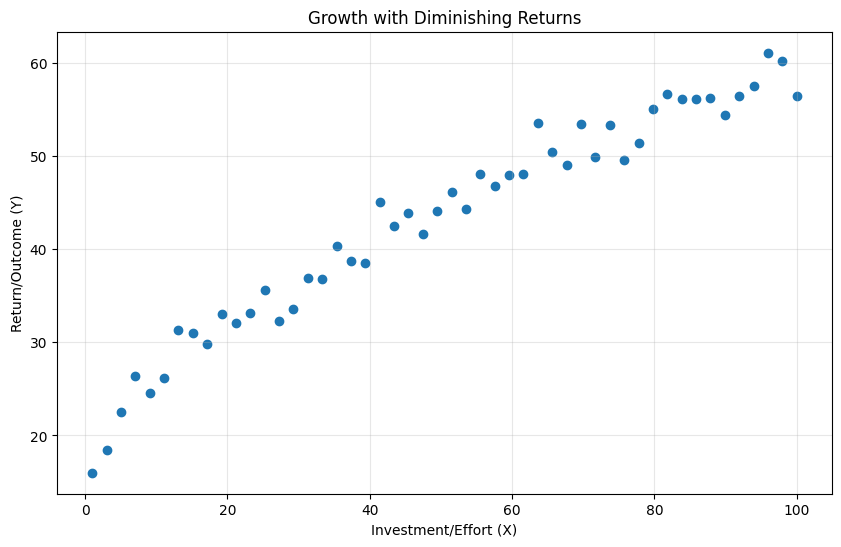

In [115]:
import numpy as np
import matplotlib.pyplot as plt


## For squre poly funciton
# # make data
# X = np.linspace(-3, 3, 50)                # 50 points between -3 and 3
# Y = 1 + 2*X + X**2 + np.random.randn(50)*2  # real function + some noise

# # visualize
# plt.scatter(X, Y, color='blue')
# plt.title("Curved (Non-Linear) Data")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.show()

## For squre root ploy feature
np.random.seed(42)
X = np.linspace(1, 100, 50)  # Domain from 1-100
Y = 5 * np.sqrt(X) + 10 + np.random.randn(50) * 2

plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.title("Growth with Diminishing Returns")
plt.xlabel("Investment/Effort (X)")
plt.ylabel("Return/Outcome (Y)")
plt.grid(True, alpha=0.3)
plt.show()


In [130]:
def standardization_scalling(x , y):
    x_scaled = ( x - x.mean(axis=0)) / x.std(ddof=0)
    y_scaled=  ( y - y.mean()) / y.std()
    return x_scaled , y_scaled

In [131]:
X , Y = standardization_scalling(X , Y)

In [132]:
def add_polynomial_features(x , degree):
    x_poly = np.zeros((x.shape[0] , degree))
    for i in range(0 , degree):
        x_poly[: , i]  = x ** (i +1)
    return x_poly

def add_root_features(x, max_roots):
    x_roots = np.zeros((x.shape[0], max_roots))
    for i in range(0, max_roots):
        # Start with x^1, then x^(1/2), x^(1/3), etc.
        power = 1/(i+1) if i > 0 else 1
        x_roots[:, i] = x ** power
    return x_roots
print(add_polynomial_features(X , 3))

[[-1.69774938e+00  2.88235294e+00 -4.89351291e+00]
 [-1.62845348e+00  2.65186074e+00 -4.31843186e+00]
 [-1.55915759e+00  2.43097239e+00 -3.79026905e+00]
 [-1.48986170e+00  2.21968788e+00 -3.30702794e+00]
 [-1.42056580e+00  2.01800720e+00 -2.86671202e+00]
 [-1.35126991e+00  1.82593037e+00 -2.46732477e+00]
 [-1.28197402e+00  1.64345738e+00 -2.10686966e+00]
 [-1.21267813e+00  1.47058824e+00 -1.78335018e+00]
 [-1.14338223e+00  1.30732293e+00 -1.49476981e+00]
 [-1.07408634e+00  1.15366146e+00 -1.23913202e+00]
 [-1.00479045e+00  1.00960384e+00 -1.01444029e+00]
 [-9.35494554e-01  8.75150060e-01 -8.18698115e-01]
 [-8.66198661e-01  7.50300120e-01 -6.49908959e-01]
 [-7.96902768e-01  6.35054022e-01 -5.06076308e-01]
 [-7.27606875e-01  5.29411765e-01 -3.85203640e-01]
 [-6.58310982e-01  4.33373349e-01 -2.85294435e-01]
 [-5.89015089e-01  3.46938776e-01 -2.04352174e-01]
 [-5.19719197e-01  2.70108043e-01 -1.40380335e-01]
 [-4.50423304e-01  2.02881152e-01 -9.13823989e-02]
 [-3.81127411e-01  1.45258103e-

In [133]:

def compute_cost(x , y ,  w , b):
    prediction = x @ w + b
    m = x.shape[0]
    return (1/(2*m)) * np.sum((prediction - y) ** 2)

In [134]:
def compute_gradients(x , y , w , b):
    m = x.shape[0]
    prediction = x @ w + b
    error  = prediction - y
    dj_dw = (1/m) * x.T @ error
    dj_db = (1/m) * np.sum(error)
    return dj_dw , dj_db



In [135]:
def gradient_descent(x , y , w, b , alpha , num_iters , tol=1e-5):
    compute_history = []
    prev_cost = None
    for i in range(num_iters):
        dj_dw , dj_db = compute_gradients(x , y, w , b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if(i%5000 == 0):
            cost = compute_cost(x , y, w, b)
            compute_history.append(cost) 
            if prev_cost is not None and prev_cost - cost > tol:
                print(f"Convered at iter:{i:6d} cost:{cost:.2e}")    
                break
            print(f"iter:{i:6d} cost:{cost:.2e}")
    return w , b , compute_history

In [136]:
degree = 3
x_poly = add_polynomial_features(X, degree)

w_init = np.zeros(degree)
b_init = 0
alpha = 0.001
iterations = 500000
tol = 1e-5

w_final, b_final, history = gradient_descent(x_poly, Y, w_init, b_init, alpha, iterations , tol=tol)

print("Weights:", w_final)
print("Bias:", b_final)

iter:     0 cost:4.96e-01
iter:  5000 cost:2.41e-02
iter: 10000 cost:1.61e-02
iter: 15000 cost:1.40e-02
iter: 20000 cost:1.34e-02
iter: 25000 cost:1.32e-02
iter: 30000 cost:1.32e-02
iter: 35000 cost:1.32e-02
iter: 40000 cost:1.32e-02
iter: 45000 cost:1.32e-02
iter: 50000 cost:1.32e-02
iter: 55000 cost:1.32e-02
iter: 60000 cost:1.32e-02
iter: 65000 cost:1.32e-02
iter: 70000 cost:1.32e-02
iter: 75000 cost:1.32e-02
iter: 80000 cost:1.32e-02
iter: 85000 cost:1.32e-02
iter: 90000 cost:1.32e-02
iter: 95000 cost:1.32e-02
iter:100000 cost:1.32e-02
iter:105000 cost:1.32e-02
iter:110000 cost:1.32e-02
iter:115000 cost:1.32e-02
iter:120000 cost:1.32e-02
iter:125000 cost:1.32e-02
iter:130000 cost:1.32e-02
iter:135000 cost:1.32e-02
iter:140000 cost:1.32e-02
iter:145000 cost:1.32e-02
iter:150000 cost:1.32e-02
iter:155000 cost:1.32e-02
iter:160000 cost:1.32e-02
iter:165000 cost:1.32e-02
iter:170000 cost:1.32e-02
iter:175000 cost:1.32e-02
iter:180000 cost:1.32e-02
iter:185000 cost:1.32e-02
iter:190000 

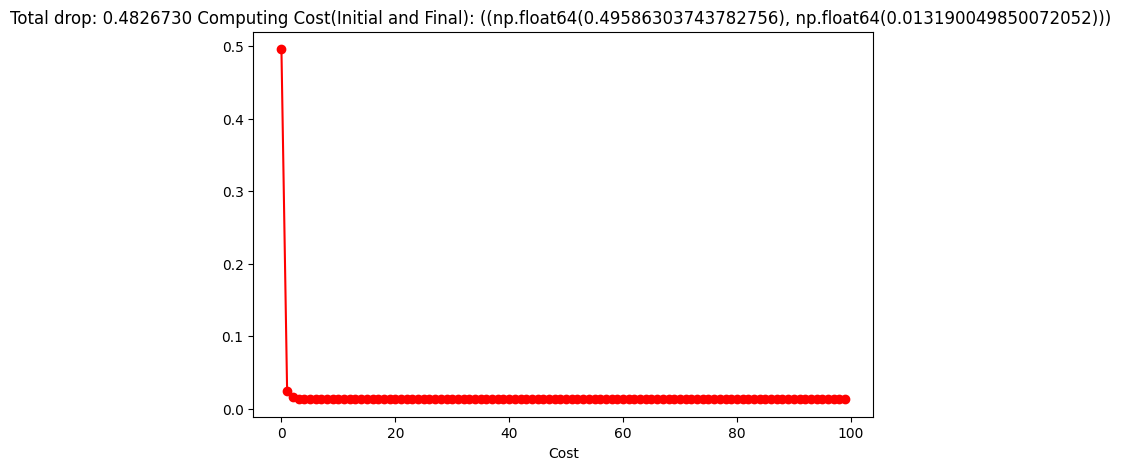

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8 , 5))
plt.plot(range(len(history)) , history , 
color='red',
marker='o')
plt.xlabel("Itaration every 5000")
plt.xlabel('Cost')
plt.title(f'Total drop: {history[0]-history[-1]:.7f} Computing Cost(Initial and Final): ({history[0] , history[-1]}) ')


value=False
if value:
    for i in range(len(history)):
        plt.text(i , history[i] , f'{history[i]:.3f}')
plt.show()

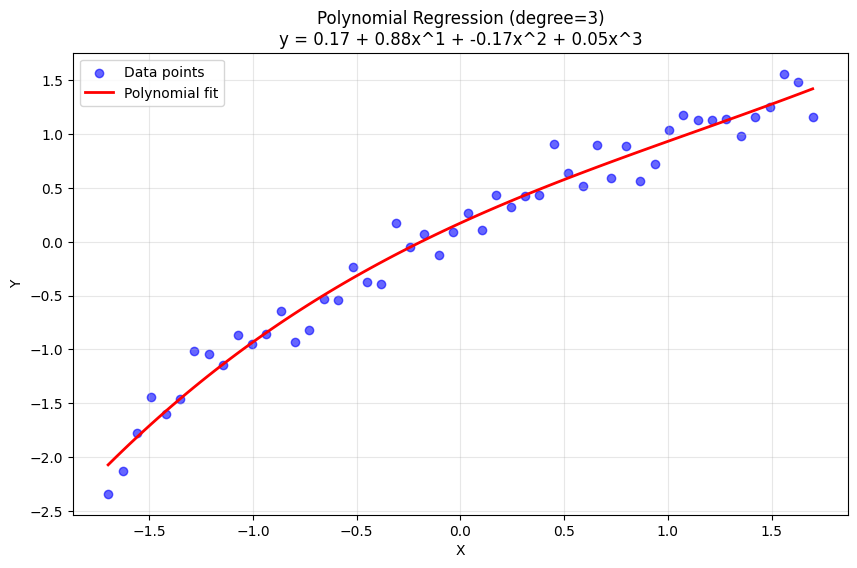

In [138]:
# Plot the original data and polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', alpha=0.6, label='Data points')

# Generate smooth curve for the model prediction
X_smooth = np.linspace(min(X), max(X), 100)  # 100 points for a smooth curve
X_poly_smooth = add_polynomial_features(X_smooth, degree)  # polynomial features
Y_pred = X_poly_smooth @ w_final + b_final  # model predictions

# Plot the prediction curve
plt.plot(X_smooth, Y_pred, color='red', linewidth=2, label='Polynomial fit')

# Add model equation as text on the plot
equation = f'y = {b_final:.2f}'
for i in range(degree):
    equation += f' + {w_final[i]:.2f}x^{i+1}'
    
plt.title(f'Polynomial Regression (degree={degree})\n{equation}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Square Root Feature Dataset

Below we create a dataset that follows a square root pattern - it increases rapidly at first, then gradually levels off. This pattern is commonly found in:

- Learning curves (performance vs. training time)
- Economic returns on investment
- Population growth with limited resources
- Many natural phenomena with saturation effects

For this type of data, using square root features (x^(1/2), x^(1/3), etc.) will typically provide a better fit than polynomial features.

In [123]:
# Fit model with root features to the diminishing returns data
max_roots = 3  # Try with 3 root features: x, sqrt(x), cbrt(x)

# Use the root features function
x_roots = add_root_features(X_root, max_roots)

# Initialize weights and bias
w_init = np.zeros(max_roots)
b_init = 0
alpha = 0.01
iterations = 100000
tol = 1e-6

# Train model
w_root, b_root, root_history = gradient_descent(x_roots, Y_root, w_init, b_init, alpha, iterations, tol=tol)

print("Root Features Model Results:")
print("Weights:", w_root)
print("Bias:", b_root)
print("Final cost:", root_history[-1])

iter:     0 cost:3.05e+06
iter:  5000 cost:nan
iter: 10000 cost:nan
iter: 15000 cost:nan
iter: 20000 cost:nan
iter: 25000 cost:nan
iter: 30000 cost:nan
iter: 35000 cost:nan
iter: 40000 cost:nan
iter: 45000 cost:nan
iter: 50000 cost:nan
iter: 55000 cost:nan
iter: 60000 cost:nan
iter: 65000 cost:nan
iter: 70000 cost:nan
iter: 75000 cost:nan
iter: 80000 cost:nan
iter: 85000 cost:nan
iter: 90000 cost:nan


/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_30009/2107847737.py:5: RuntimeWarning: overflow encountered in matmul
  dj_dw = (1/m) * x.T @ error
/Users/ankush/Code/AI-ML/ML-Classified/env/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_30009/3758797186.py:6: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * dj_dw
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_30009/3758797186.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  b -= alpha * dj_db


iter: 95000 cost:nan
Root Features Model Results:
Weights: [nan nan nan]
Bias: nan
Final cost: nan


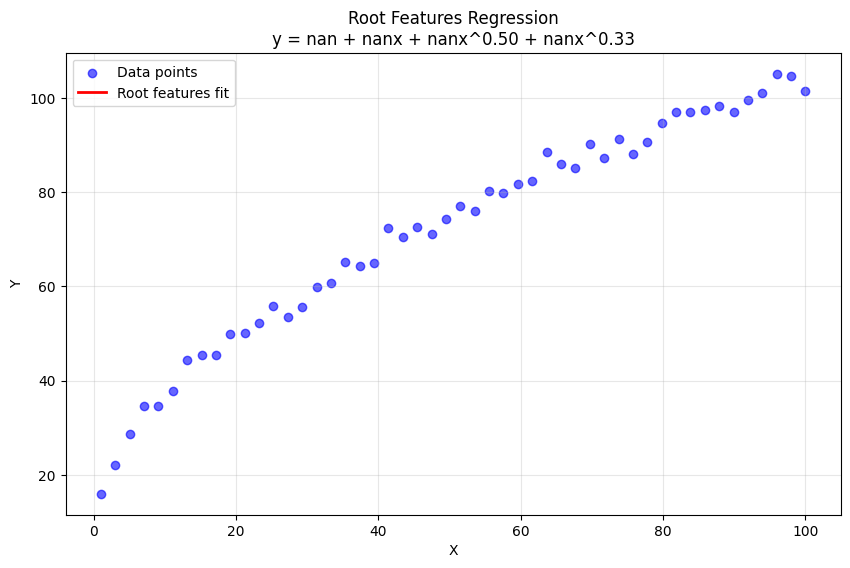

In [124]:
# Plot the original data and root features fit
plt.figure(figsize=(10, 6))
plt.scatter(X_root, Y_root, color='blue', alpha=0.6, label='Data points')

# Generate smooth curve for the model prediction
X_smooth = np.linspace(min(X_root), max(X_root), 200)  # 200 points for a smooth curve
X_root_smooth = add_root_features(X_smooth, max_roots)  # root features
Y_pred = X_root_smooth @ w_root + b_root  # model predictions

# Plot the prediction curve
plt.plot(X_smooth, Y_pred, color='red', linewidth=2, label='Root features fit')

# Add model equation as text on the plot
equation = f'y = {b_root:.2f}'
for i in range(max_roots):
    root_power = f"^{1/(i+1):.2f}" if i > 0 else ""
    equation += f' + {w_root[i]:.2f}x{root_power}'
    
plt.title(f'Root Features Regression\n{equation}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

iter:     0 cost:4.41e+13
iter:  5000 cost:nan
iter: 10000 cost:nan
iter: 15000 cost:nan
iter: 20000 cost:nan
iter: 25000 cost:nan
iter: 30000 cost:nan
iter: 35000 cost:nan
iter: 40000 cost:nan
iter: 45000 cost:nan


/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_30009/2107847737.py:5: RuntimeWarning: overflow encountered in matmul
  dj_dw = (1/m) * x.T @ error
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_30009/3758797186.py:6: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * dj_dw
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_30009/3758797186.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  b -= alpha * dj_db


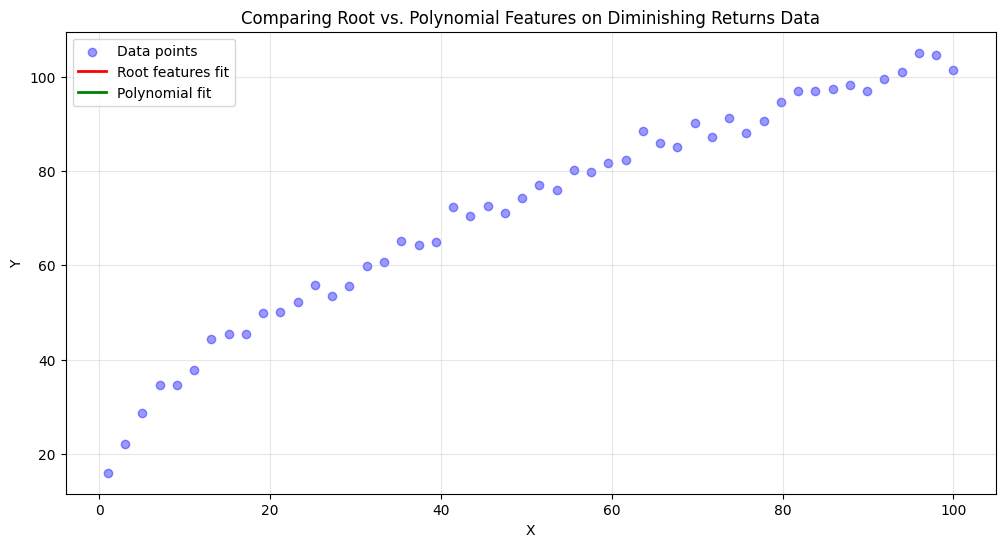

ValueError: operands could not be broadcast together with shapes (200,) (50,) 

In [125]:
# Compare polynomial vs. root features on this data

# Try fitting polynomial features to the diminishing returns dataset
poly_degree = 3
X_poly = add_polynomial_features(X_root, poly_degree)

# Train polynomial model
w_poly_init = np.zeros(poly_degree)
b_poly_init = 0

w_poly, b_poly, poly_history = gradient_descent(
    X_poly, Y_root, w_poly_init, b_poly_init, alpha=0.000001, num_iters=50000, tol=1e-6
)

# Generate predictions for both models
X_smooth = np.linspace(min(X_root), max(X_root), 200)
X_root_smooth = add_root_features(X_smooth, max_roots)
Y_pred_root = X_root_smooth @ w_root + b_root

X_poly_smooth = add_polynomial_features(X_smooth, poly_degree)
Y_pred_poly = X_poly_smooth @ w_poly + b_poly

# Plotting both fits
plt.figure(figsize=(12, 6))
plt.scatter(X_root, Y_root, color='blue', alpha=0.4, label='Data points')
plt.plot(X_smooth, Y_pred_root, color='red', linewidth=2, label='Root features fit')
plt.plot(X_smooth, Y_pred_poly, color='green', linewidth=2, label='Polynomial fit')

plt.title('Comparing Root vs. Polynomial Features on Diminishing Returns Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print final costs (MSE)
root_mse = compute_cost(X_root_smooth, Y_root, w_root, b_root)
poly_mse = compute_cost(X_poly_smooth, Y_root, w_poly, b_poly)
print(f"Root features MSE: {root_mse:.4f}")
print(f"Polynomial features MSE: {poly_mse:.4f}")
print(f"Better model: {'Root' if root_mse < poly_mse else 'Polynomial'} features")